<a href="https://colab.research.google.com/github/asifsohailmd/F20-Fundamentals-Workshop/blob/master/fundamentals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
from sklearn import tree
from sklearn.metrics import accuracy_score

In [2]:
url = "https://raw.githubusercontent.com/aisutd/F20-Fundamentals-Workshop/master/data/data.csv"
df = pd.read_csv(url)

In [3]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [5]:
# Features
X = df.iloc[:,2:]

In [6]:
# Encoding target values with value between 0 and 1
encoder = LabelEncoder()
encoder.fit(df.iloc[:, 1:2])
y = encoder.transform(df.iloc[:, 1:2])

/home/brijml/anaconda3/envs/thesis/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [7]:
# Splitting Features and Labels in to Training and Testing subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [52]:
# Decision Tree Classifier
model = tree.DecisionTreeClassifier(criterion='gini', max_depth=3)
model = model.fit(X_train, y_train)

In [53]:
model.get_params

<bound method BaseEstimator.get_params of DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')>

In [54]:
# Predicting on both Training and Testing Data
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [55]:
# Accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

In [56]:
print("Training Accuracy :", train_accuracy)
print("Testing Accuracy :", test_accuracy)

Training Accuracy : 0.9626373626373627
Testing Accuracy : 0.9385964912280702


### The code in the following cells is written by [brijml](https://github.com/brijml) 

#### Use Thresholding method to convert the continuous valued features into binary features for the Naive Bayes model. A Naive Bayes model for Bernoulli distribution is a linear classifier

In [9]:
def calc_threshold(data, attribute, n_bins=10):
    malignant_counts, malignant_bins = np.histogram(data[data['diagnosis'] == 'M'][attribute], n_bins)
    benign_counts, benign_bins = np.histogram(data[data['diagnosis'] == 'B'][attribute])
    malignant_max_point = malignant_bins[np.argmax(malignant_counts)+1]
    benign_max_point = benign_bins[np.argmax(benign_counts)+1]
    return (malignant_max_point+benign_max_point)/2

### This is an example of how it works. The histogram for two classes clearly shows that the most of the values are concentrated around certain value with little mass crossing the threshold point.

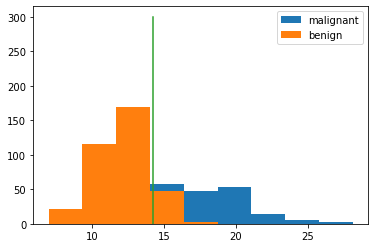

In [14]:
attribute = 'radius_mean'
data = df.copy(deep=True)
bins = np.linspace(data[attribute].min(), data[attribute].max(), 10)
plt.hist(data[data['diagnosis'] == 'M'][attribute], bins=bins, label='malignant')
plt.hist(data[data['diagnosis'] == 'B'][attribute], bins=bins, label='benign')
threshold = calc_threshold(data, attribute)
plt.plot([threshold, threshold], [0,300])
plt.legend()

#### Lets fit a Naive Bayes classifier to the data by converting every feature to a binary feature

In [15]:
for col in data.columns:
    if col == 'diagnosis': continue
    threshold = calc_threshold(data, col)
    data.loc[(data[col] <= threshold),col] = 0
    data.loc[(data[col] > threshold),col] = 1

In [17]:
y = np.array(data['diagnosis'])
X = np.array(data.drop(columns='diagnosis'))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

In [19]:
clf = BernoulliNB()
clf.fit(X_train, y_train)
print(f"accuracy: {clf.score(X_test, y_test) * 100}%")

accuracy: 94.73684210526315%
